# Data Mining Final Project

## Explanatory Data Analysis

In [116]:
# Import Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,recall_score, f1_score
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression



In [63]:
# Load dataset
df = pd.read_csv("car_prices.csv")
pd.set_option('display.max_rows', None)

In [64]:
#Check dataset

print ("Shape:", df.shape)
print ("\nNull Values:\n", df.isnull().sum())


Shape: (558837, 16)

Null Values:
 year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [66]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [68]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [69]:
# Drop na values
print ("Shape:", df.shape)
df.dropna(subset=['make', 'model', 'trim', 'body', 'transmission', 'condition', 'color', 'odometer', 'interior', 'mmr', 'sellingprice', 'saledate'], inplace=True)
print ("Shape:", df.shape)# Drop rows with missing values in 'color', 'body', and 'sellingprice' columns
df.dropna(subset=['color', 'body', 'sellingprice'], inplace=True)

Shape: (558837, 16)
Shape: (472325, 16)


In [70]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [71]:
df.describe()
df.shape

(472325, 16)

In [72]:
print ("\nNull Values:\n", df.isnull().sum())


Null Values:
 year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64


### Feature Clarification (Data Cleaning)

#### Feature 1 Year: 
Lets check each feature and remove the unneeded values to make a better data set


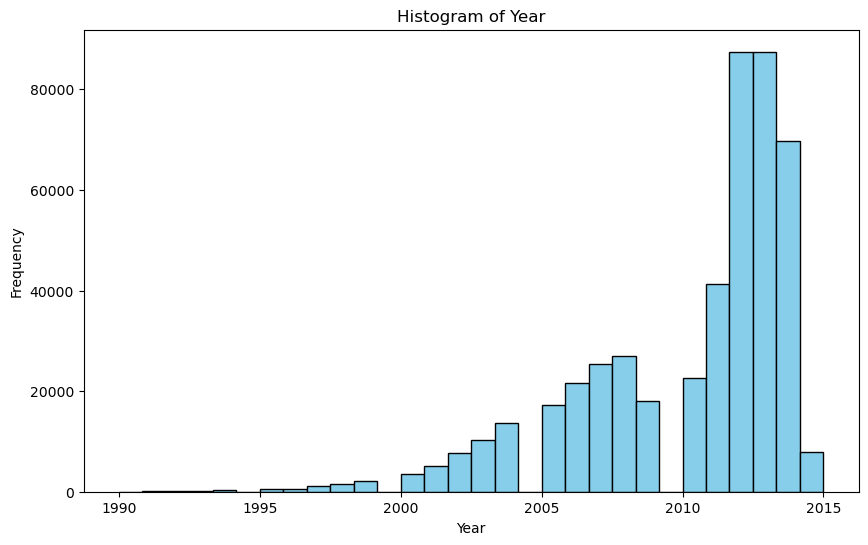

In [73]:
# Plot histogram for 'year' column
plt.figure(figsize=(10, 6))
df['year'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [74]:
# Starting year 2000 to evaluate
years_to_remove = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999]
df = df[~df['year'].isin(years_to_remove)]

print("Feature: year")
print(df['year'].value_counts())

df.shape

Feature: year
year
2013    87467
2012    87380
2014    69712
2011    41384
2008    27011
2007    25378
2010    22616
2006    21631
2009    17959
2005    17169
2004    13624
2003    10368
2015     7994
2002     7693
2001     5140
2000     3427
Name: count, dtype: int64


(465953, 16)

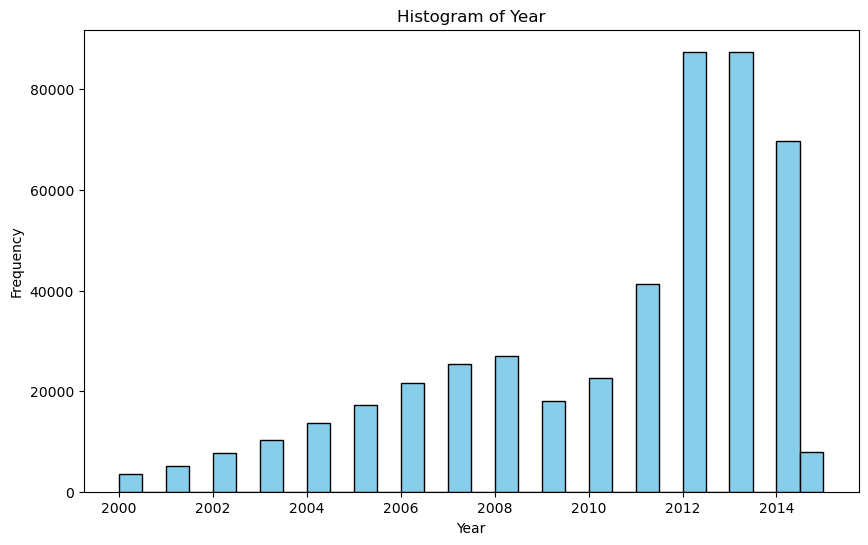

In [13]:
# Plot histogram for 'year' column
plt.figure(figsize=(10, 6))
df['year'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

#### Feature 2 Make:
Lets check each feature and remove the unneeded values to make a better data set

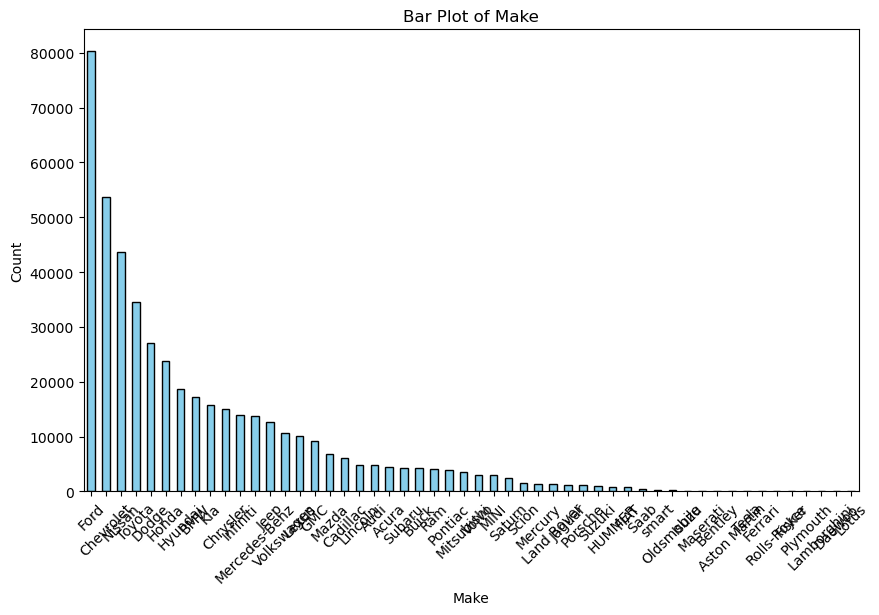

In [75]:
# Plot bar plot for 'make' column
plt.figure(figsize=(10, 6))
df['make'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Plot of Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


In [76]:
df['make'].value_counts()

make
Ford             80247
Chevrolet        53650
Nissan           43726
Toyota           34473
Dodge            27087
Honda            23833
Hyundai          18658
BMW              17249
Kia              15823
Chrysler         15051
Infiniti         13967
Mercedes-Benz    13724
Jeep             12616
Volkswagen       10662
Lexus            10100
GMC               9157
Mazda             6844
Cadillac          6133
Lincoln           4819
Audi              4762
Acura             4371
Subaru            4311
Buick             4276
Ram               4044
Pontiac           3867
Mitsubishi        3618
Volvo             2963
MINI              2946
Saturn            2433
Scion             1545
Mercury           1437
Land Rover        1306
Jaguar            1230
Porsche           1136
Suzuki             971
HUMMER             768
FIAT               725
Saab               395
smart              343
Oldsmobile         230
Isuzu              140
Maserati           109
Bentley            105
Aston 

In [77]:
# Remove the brand names less sold especially on sport cars
make_to_remove = ['Lotus', 'Daewoo', 'Lamborghini', 'Plymouth', 'Fisker', 'Rolls-Royce', 'Ferrari', 'Aston Martin', 'Bentley', 'Maserati']
df = df[~df['make'].isin(make_to_remove)]
df.shape

(465659, 16)

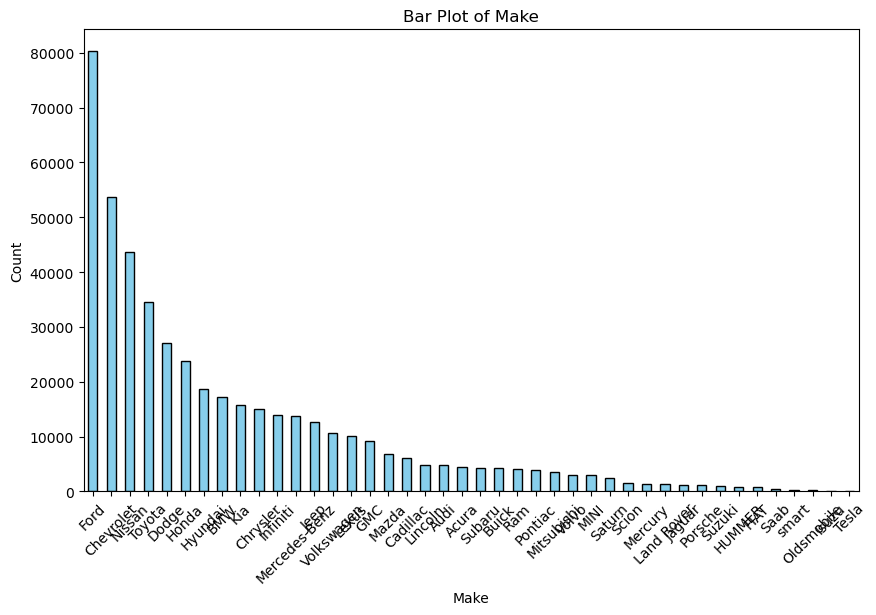

In [78]:
# Plot bar plot for 'make' column
plt.figure(figsize=(10, 6))
df['make'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Plot of Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


#### Feature 3 Model:
Lets check each feature and remove the unneeded values to make a better data set

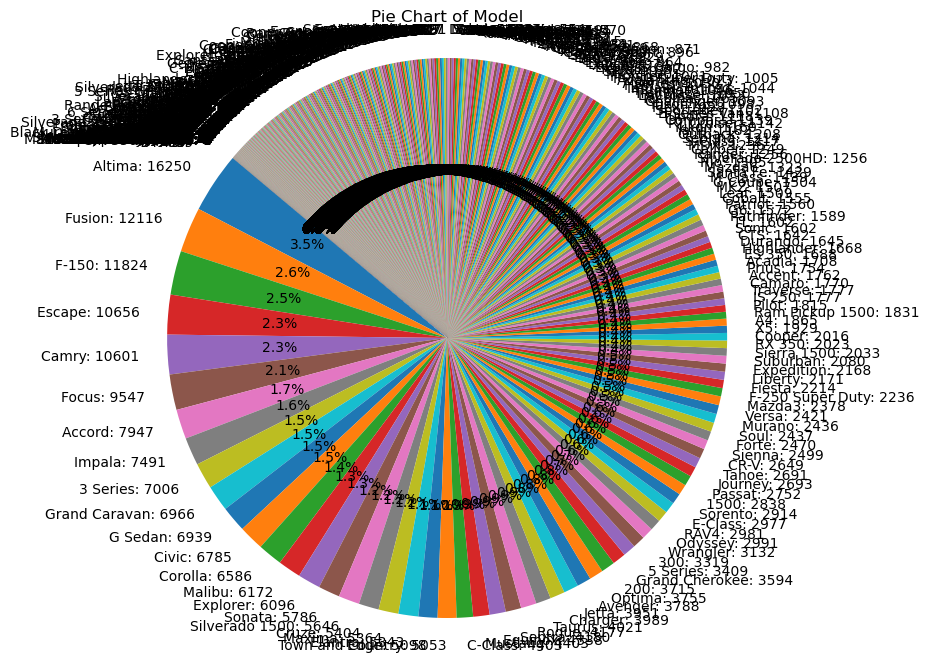

In [79]:
# Get value counts for 'model' column
model_counts = df['model'].value_counts()

# Plot pie chart for 'model' column with count numbers
plt.figure(figsize=(10, 8))
plt.pie(model_counts, labels=[f'{model}: {count}' for model, count in zip(model_counts.index, model_counts)], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Model')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [80]:
# Remove the models sold less than 100 total
model_counts = df['model'].value_counts()
models_to_keep = model_counts[model_counts >= 100].index
df = df[df['model'].isin(models_to_keep)]
df.shape

(455713, 16)

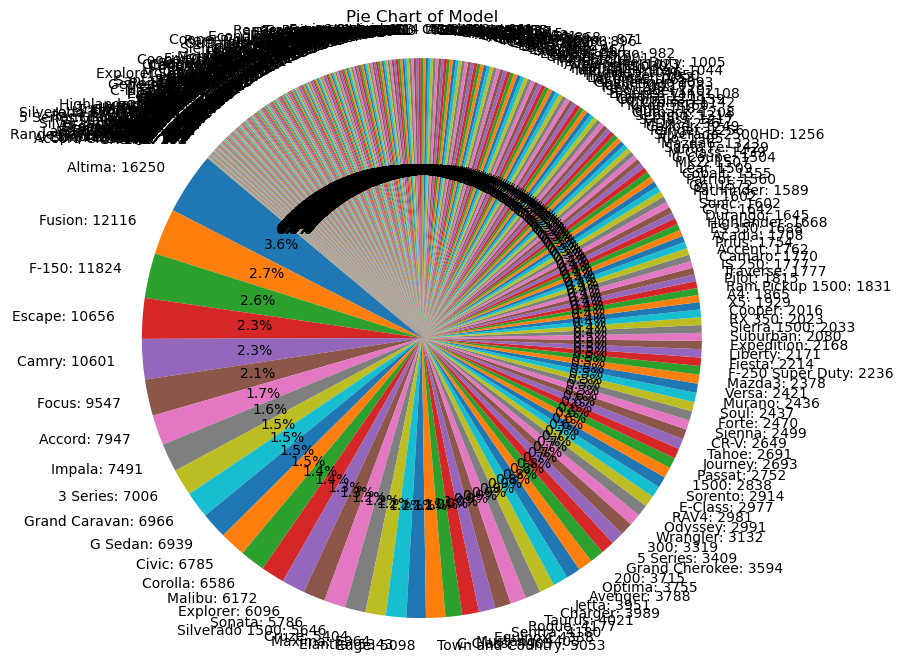

In [81]:
# Get value counts for 'model' column
model_counts = df['model'].value_counts()

# Plot pie chart for 'model' column with count numbers
plt.figure(figsize=(10, 8))
plt.pie(model_counts, labels=[f'{model}: {count}' for model, count in zip(model_counts.index, model_counts)], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Model')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Feature 4 State:
Lets check each feature and remove the unneeded values to make a better data set

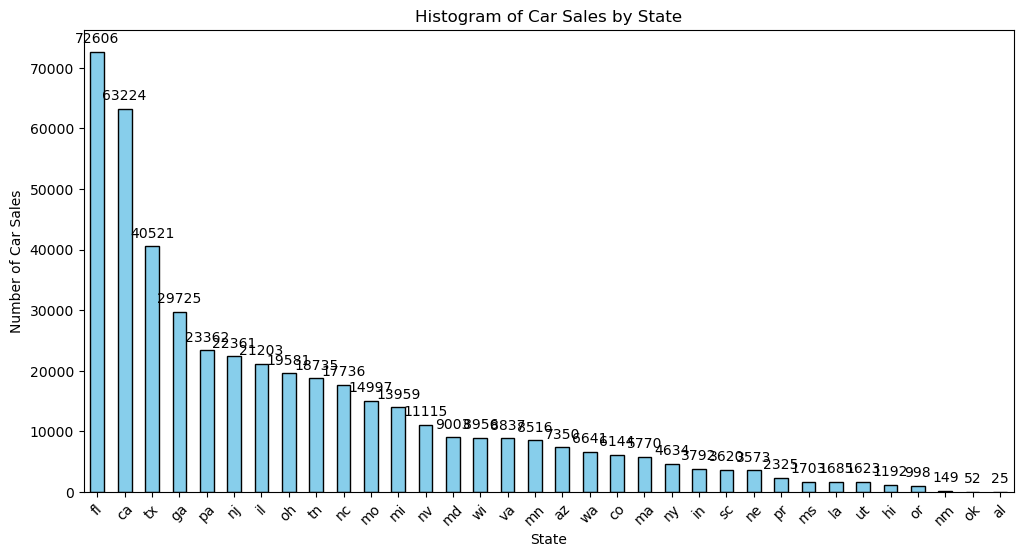

In [82]:
# Get value counts for 'state' column
state_counts = df['state'].value_counts()

# Plot bar plot for 'state' column with count numbers
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of Car Sales by State')
plt.xlabel('State')
plt.ylabel('Number of Car Sales')
plt.xticks(rotation=45)
plt.grid(False)

# Display count numbers on top of each bar
for i, count in enumerate(state_counts):
    plt.text(i, count + 1000, str(count), ha='center', va='bottom')

plt.show()

#### Feature 5 Color:
Lets check each feature and remove the unneeded values to make a better data set

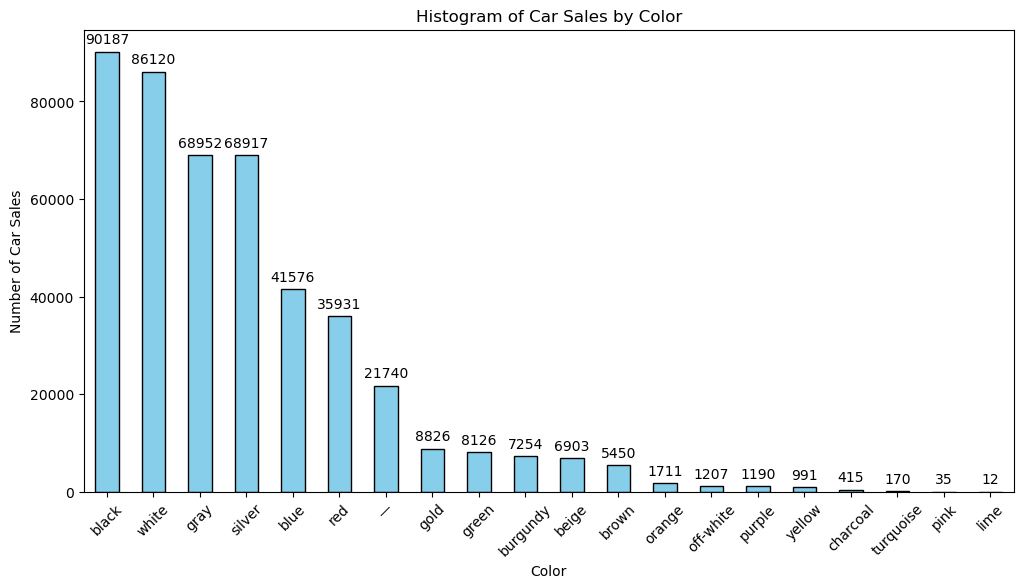

In [83]:
# Plot bar plot for 'color' column
plt.figure(figsize=(12, 6))
df['color'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of Car Sales by Color')
plt.xlabel('Color')
plt.ylabel('Number of Car Sales')
plt.xticks(rotation=45)
plt.grid(False)

# Display count numbers on top of each bar
for i, count in enumerate(df['color'].value_counts()):
    plt.text(i, count + 1000, str(count), ha='center', va='bottom')

plt.show()

#### Feature 6 Interior:
Lets check each feature and remove the unneeded values to make a better data set

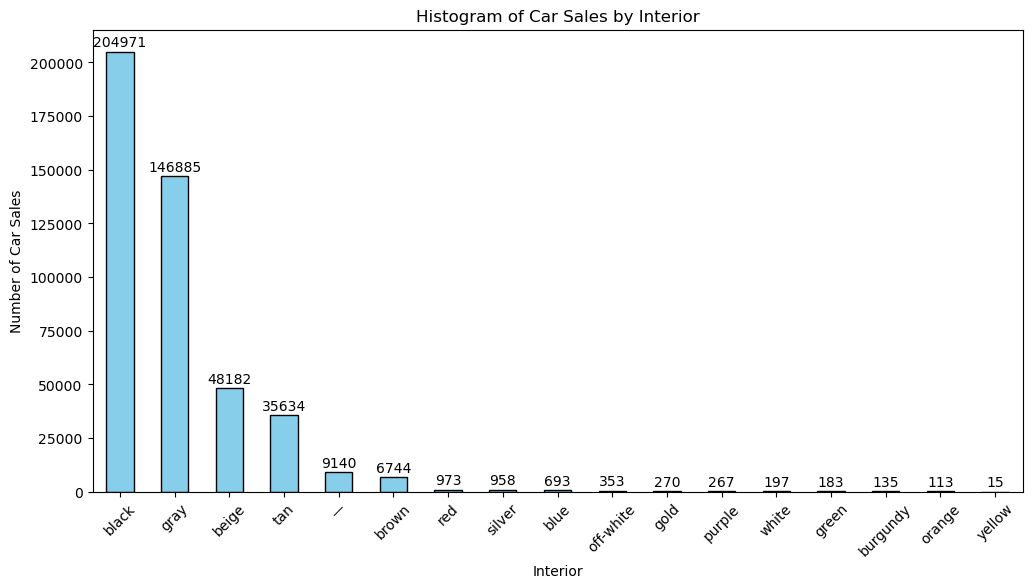

In [84]:
# Plot bar plot for 'interior' column
plt.figure(figsize=(12, 6))
df['interior'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of Car Sales by Interior')
plt.xlabel('Interior')
plt.ylabel('Number of Car Sales')
plt.xticks(rotation=45)
plt.grid(False)

# Display count numbers on top of each bar
for i, count in enumerate(df['interior'].value_counts()):
    plt.text(i, count + 1000, str(count), ha='center', va='bottom')

plt.show()

#### Feature 7 Selling Price:
Lets check each feature and remove the unneeded values to make a better data set

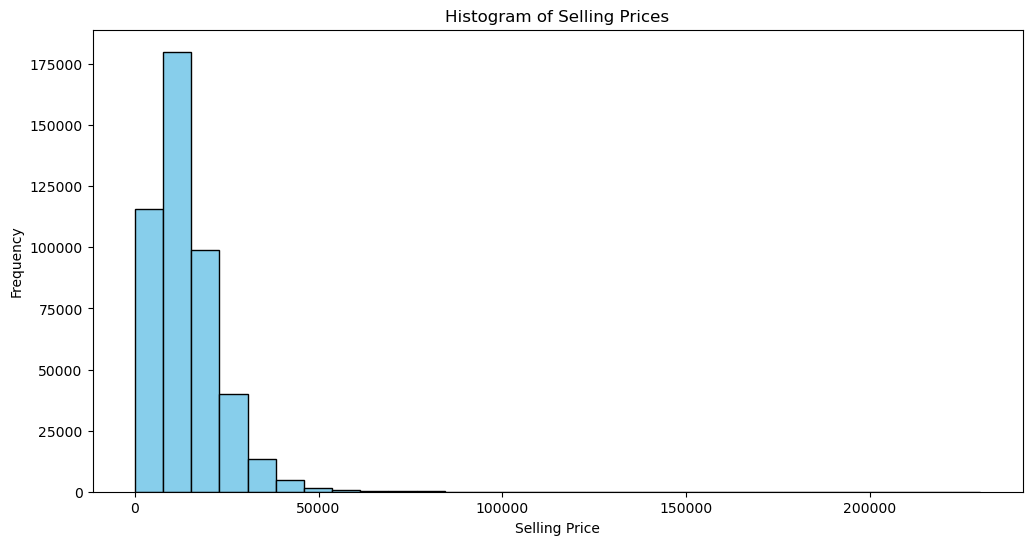

(455713, 16)

In [85]:
# Plot histogram for 'sellingprice' column
plt.figure(figsize=(12, 6))
plt.hist(df['sellingprice'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()
df.shape

In [88]:
df['sellingprice'].describe()

count    442522.000000
mean      12908.891359
std        7474.851339
min           1.000000
25%        7400.000000
50%       12100.000000
75%       17600.000000
max       34250.000000
Name: sellingprice, dtype: float64

Filtered DataFrame shape (without outliers): (442522, 16)


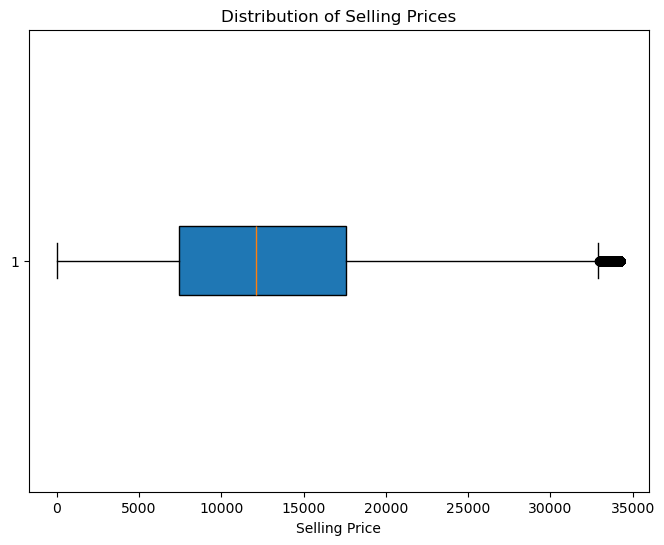

In [87]:
# Calculate the first and third quartiles
Q1 = df['sellingprice'].quantile(0.25)
Q3 = df['sellingprice'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df = df[(df['sellingprice'] >= lower_bound) & (df['sellingprice'] <= upper_bound)]

# Print the shape of the filtered DataFrame to see how many outliers were removed
# print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape (without outliers):", df.shape)

# Create a box plot for 'sellingprice'
plt.figure(figsize=(8, 6))
plt.boxplot(df['sellingprice'], vert=False, patch_artist=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.grid(False)
plt.show()


In [90]:
# Filter the DataFrame to remove rows where 'sellingprice' is equal to 1
df = df[df['sellingprice'] != 1]

# Print the shape of the filtered DataFrame to see how many rows were removed
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape (without selling price equal to 1):", df.shape)

Original DataFrame shape: (442520, 16)
Filtered DataFrame shape (without selling price equal to 1): (442520, 16)


In [91]:
df['sellingprice'].describe()

count    442520.000000
mean      12908.949697
std        7474.817860
min         100.000000
25%        7400.000000
50%       12100.000000
75%       17600.000000
max       34250.000000
Name: sellingprice, dtype: float64

In [92]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,442520.000000,442520.000000,442520.000000,442520.000000,442520.000000
mean,2010.367253,30.923267,66193.886403,13074.602391,12908.949697
std,3.487644,13.035747,50226.370666,7408.504971,7474.817860
min,2000.000000,1.000000,1.000000,25.000000,100.000000
25%,2008.000000,24.000000,28845.000000,7625.000000,7400.000000
50%,2012.000000,35.000000,51477.500000,12200.000000,12100.000000
75%,2013.000000,41.000000,95513.000000,17650.000000,17600.000000
max,2015.000000,49.000000,999999.000000,58400.000000,34250.000000


### Data Cleaning Summary
- Total data set has 558837 rows. After cleaning we only have 442520. So116317 rows are removed for the better model evaluations.
    - Data set: Shape: (558837, 16)
    - After Cleaning NA Values: Shape: (472325, 16)
    - After removing Early 2000 models(465953, 16)
    - After removing very less sold models: (465659, 16)
    - After removing less than 100 sold cars: (455713, 16)
    - After removing 1 USD car sale prices(442520, 16)
- Based on the above information after cleaning outliers, null values, some nish selling cars, and unrealistic sale prices statistical information also become better


### Insights
We will be evaluating some insights in order to understand the data better

#### Insight 1: What are the top brands customer like to buy?
- Top 10 selected car brands are Nissan, Ford, Toyota, Honda, Chevrolet, and BMW. Nissan is the lead with the Altima model. Followed by Ford Fusion and F-150 truck.
- Top-10 model are belong to sedan models but only except F-150 because it is the legend truck in the USD when it was first introduced. It had sold 11950 count and getting the 3rd place in the list.

Top Selling Car Make and Model:
          make          model  count
291     Nissan         Altima  16248
133       Ford         Fusion  12113
124       Ford          F-150  11120
118       Ford         Escape  10652
346     Toyota          Camry  10600
130       Ford          Focus   9545
152      Honda         Accord   7947
65   Chevrolet         Impala   7491
100      Dodge  Grand Caravan   6965
185   Infiniti        G Sedan   6938


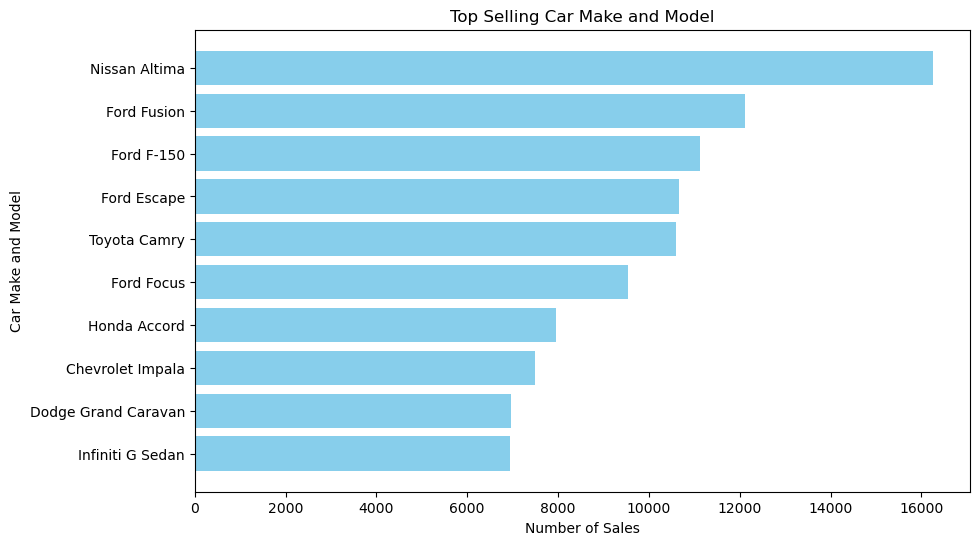

In [93]:
# 1. Top Selling Car Make and Model
top_selling_cars = df.groupby(['make', 'model']).size().reset_index(name='count')
top_selling_cars = top_selling_cars.sort_values(by='count', ascending=False).head(10)

# Display table information
print("Top Selling Car Make and Model:")
print(top_selling_cars)

# Plot bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_selling_cars['make'] + ' ' + top_selling_cars['model'], top_selling_cars['count'], color='skyblue')
plt.xlabel('Number of Sales')
plt.ylabel('Car Make and Model')
plt.title('Top Selling Car Make and Model')
plt.gca().invert_yaxis() 
plt.show()

### Insight 2: What are the most trusted cars

Top 3 brands of the buying frequency for the cars are Ford, Chevrolet, Nissan, Toyota, and Dodge. This result will show us consumers are selecting either Japanese or American cars. Mostly Japanese cars has severe advatages based on America cars are:
- They are fuel economic
- They have less engine based on American cars
- Maintenance are less expensive than American cars

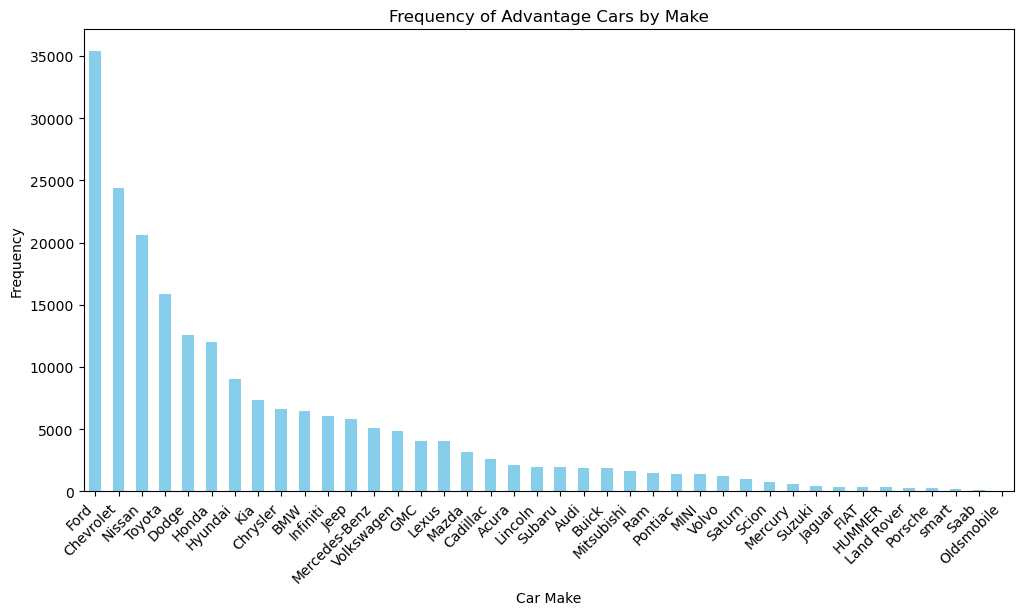

In [94]:
# Calculate the difference between selling price and MMR
df['price_difference'] = df['sellingprice'] - df['mmr']

# Identify advantage cars (positive price difference indicates advantage)
advantage_cars = df[df['price_difference'] > 0]

# Count the number of advantage cars for each make
advantage_cars_by_make = advantage_cars['make'].value_counts()

# Plot bar graph
plt.figure(figsize=(12, 6))
advantage_cars_by_make.plot(kind='bar', color='skyblue')
plt.title('Frequency of Advantage Cars by Make')
plt.xlabel('Car Make')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()



### Insight 3: What are the active years on car sales

Based on the dataset most cars are build in 2012 and 2013. Based on the below CNN news it was related with the market. Market was suddenly down after 2007 and started to sales back again end of 2012 and beginning 0f 2013. And we can see that it was back to drop again 2015

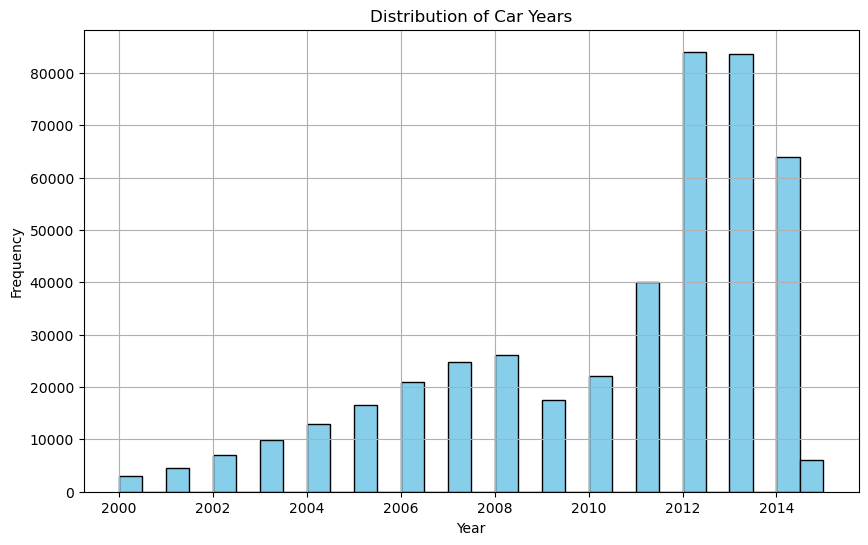

In [95]:
# Customer Behavior on Buying a New Car
# Distribution of 'year'

# Plot histogram of 'year'
plt.figure(figsize=(10, 6))
plt.hist(df['year'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Car Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Insight 4: What are the most selected colors of the cars?

Consumers mostly selects the main colors like black, White, silver, and gray car colors. 

![image.jpeg](attachment:image.jpeg)

Frequency of Each Car Color:
color
black        85974
white        82831
silver       67829
gray         67310
blue         41046
red          35235
—            20753
gold          8739
green         8065
burgundy      7144
beige         6812
brown         5196
orange        1685
purple        1166
off-white     1155
yellow         957
charcoal       407
turquoise      169
pink            35
lime            12
Name: count, dtype: int64


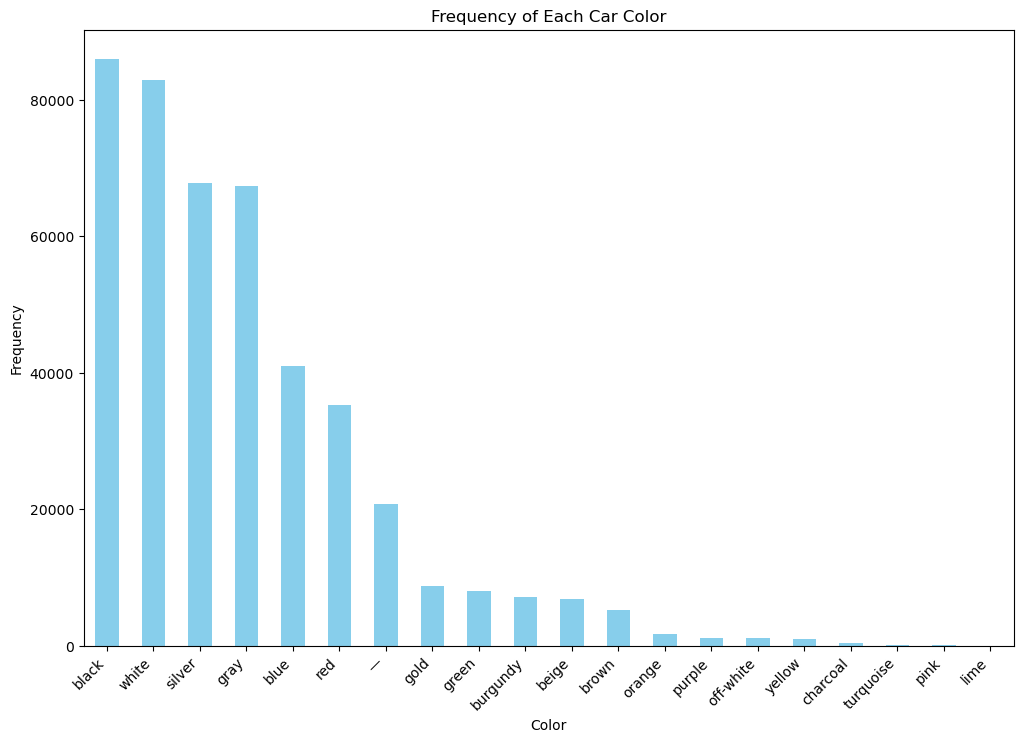

In [96]:
# Display table information
print("Frequency of Each Car Color:")
print(df['color'].value_counts())

# Plot bar graph to visualize frequency of each color
plt.figure(figsize=(12, 8))
color_frequency = df['color'].value_counts()
color_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Each Car Color')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') 
plt.show()


### Insight 5: How is the seasonal trend?

According to graph cars are mostly bought in December, January, February and March. These are the new models are mostly announced and old models are sold cheaper then the new ones. Also summer time hits the sale and I think this might be related with holiday season


/var/folders/9x/mxyckgjn73n1_w08rs2wdqmr0000gn/T/ipykernel_77557/3259250144.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'], utc=True).dt.tz_convert(None)


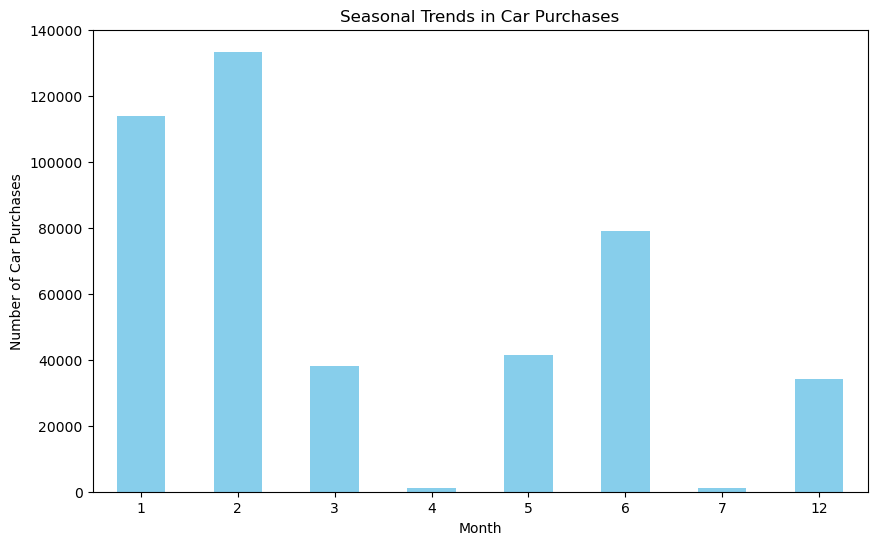

In [97]:
# Convert 'saledate' to datetime format and remove timezone information
df['saledate'] = pd.to_datetime(df['saledate'], utc=True).dt.tz_convert(None)

# Extract month from 'saledate'
df['month'] = df['saledate'].dt.month

# Count the number of car purchases for each month
monthly_car_purchases = df['month'].value_counts().sort_index()

# Plot bar graph to visualize seasonal trends in car purchases
plt.figure(figsize=(10, 6))
monthly_car_purchases.plot(kind='bar', color='skyblue')
plt.title('Seasonal Trends in Car Purchases')
plt.xlabel('Month')
plt.ylabel('Number of Car Purchases')
plt.xticks(rotation=0)
plt.show()

### Insight 6: How does miles affect to buying cars?

People mostly interested to buy less than 50K miles on the car. 230K people selects less than 50K, and 130K people select between 50K – 100K miles


Table: Number of Cars Sold Based on Odometer Readings
  Odometer Range  Number of Cars Sold
0          0-50k               216241
1       50k-100k               125423
2      100k-150k                70240
3      150k-200k                23735
4      200k-250k                 5403
5      250k-300k                 1073
6      300k-350k                  258
7      350k-400k                   59
8          400k+                   88


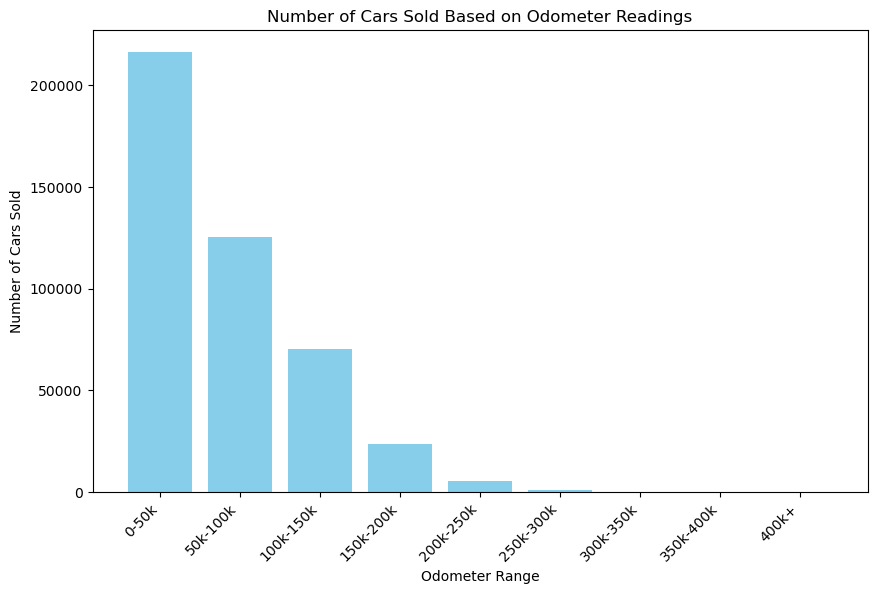

In [98]:

# Define the bins for odometer readings
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, float('inf')]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k+']

# Assign each car to its corresponding bin based on odometer reading
df['odometer_bin'] = pd.cut(df['odometer'], bins=bins, labels=labels, right=False)

# Create a table showing the number of cars sold based on odometer readings
odometer_counts = df['odometer_bin'].value_counts().sort_index()
odometer_counts_table = pd.DataFrame({'Odometer Range': odometer_counts.index, 'Number of Cars Sold': odometer_counts.values})

# Display the table
print("Table: Number of Cars Sold Based on Odometer Readings")
print(odometer_counts_table)

# Plot bar graph to visualize the number of cars sold based on odometer readings
plt.figure(figsize=(10, 6))
plt.bar(odometer_counts.index, odometer_counts.values, color='skyblue')
plt.title('Number of Cars Sold Based on Odometer Readings')
plt.xlabel('Odometer Range')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

### Insight 7: Which caolors are selected based on top 5 soldout cars?

As per reports we can see that top 2 colors on mostly sold brands are black and White colors

<Figure size 1200x800 with 0 Axes>

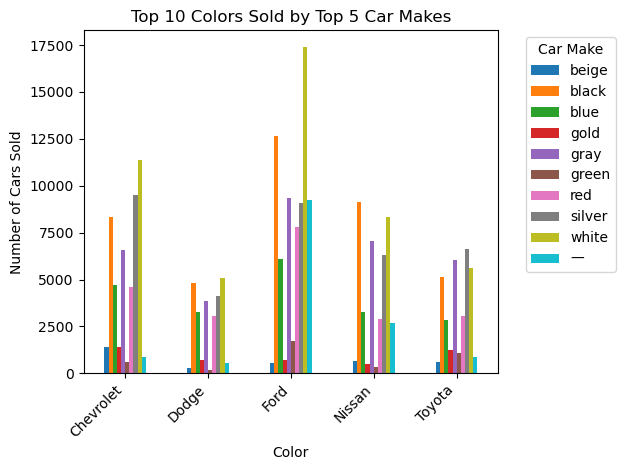

In [99]:
# Get the top 5 sold car brands
top_brands = df['make'].value_counts().nlargest(5).index

# Filter the data to include only the top 5 brands
df_top_brands = df[df['make'].isin(top_brands)]

# Get the top 10 sold colors
top_colors = df_top_brands['color'].value_counts().nlargest(10).index

# Filter the data to include only the top 10 colors
df_top_colors = df_top_brands[df_top_brands['color'].isin(top_colors)]

# Group the filtered data by 'make' and 'color', and count the number of cars sold for each combination
make_color_counts = df_top_colors.groupby(['make', 'color']).size().unstack(fill_value=0)

# Plot grouped bar chart to visualize top 10 colors sold by each top 5 car make
plt.figure(figsize=(12, 8))
make_color_counts.plot(kind='bar', stacked=False, colormap='tab10')
plt.title('Top 10 Colors Sold by Top 5 Car Makes')
plt.xlabel('Color')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Car Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Insight 8: What are the favorite body types?

As we can see from the graph that mostly US car market consumers selects the sedan cars. And it has been followed by SUV. Hatchback and VANs are rarely selected. This will give an idea about the culture I guess. Middle east people mostly selects the SUV models.


Table: Top 10 Most Sold Car Body Types
  Car Body Type  Number of Cars Sold
0         Sedan               201210
1           SUV               112283
2     hatchback                22690
3       minivan                21412
4         coupe                13725
5         wagon                13547
6      crew cab                11886
7   convertible                 7326
8       g sedan                 6938
9     supercrew                 6888


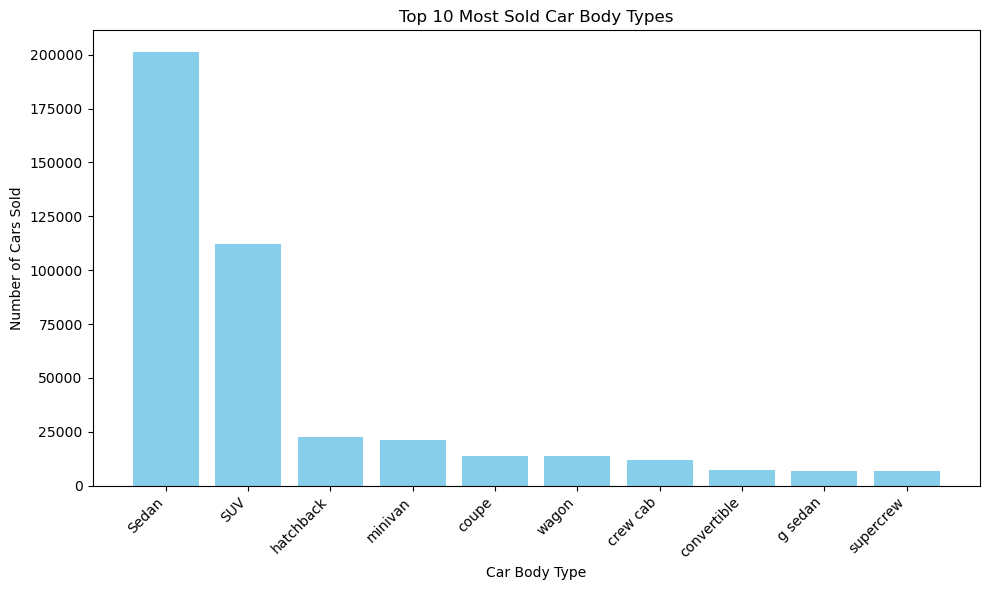

In [100]:
# Merge 'SUV' with 'suv' and 'Sedan' with 'sedan'
df['body'] = df['body'].str.lower().replace({'suv': 'SUV', 'sedan': 'Sedan'})

# Count the occurrences of each body type
body_counts = df['body'].value_counts().nlargest(10)

# Create a table to show the top 10 most sold car body types
body_counts_table = pd.DataFrame({'Car Body Type': body_counts.index, 'Number of Cars Sold': body_counts.values})

# Display the table
print("Table: Top 10 Most Sold Car Body Types")
print(body_counts_table)

# Plot a bar graph to visualize the top 10 most sold car body types
plt.figure(figsize=(10, 6))
plt.bar(body_counts.index, body_counts.values, color='skyblue')
plt.title('Top 10 Most Sold Car Body Types')
plt.xlabel('Car Body Type')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Insight 9: What are the top states of car buying?

First 2 states are California and Florida. This will give an idea that these state consumers are very offenly change their cars. And also financially in good situation.


Car Makes Sold Based on States (Top 10 Makes Only):
make    BMW  Chevrolet  Chrysler  Dodge  Ford  Honda  Hyundai   Kia  Nissan  \
state                                                                         
al        0          5         0      4     6      0        0     1       1   
az      142       1191       242    557   983    237      365   257     651   
ca     4314       5460      1432   2717  7506   3398     2643  1679    6182   
co       68        835       157    364  1251     95      191   400     737   
fl     2512       6652      2408   3992  8905   2865     4225  2785    7282   
ga     1150       3107       879   1664  4371   1874     1276  1203    3049   
hi       13        116        26     78   193    111       60    30     160   
il      153       2833       815   1114  5322   1410      512   230    3464   
in       14        736       330    498   505    385      120   144     182   
la       11        316        58    136   304     31       51    56     181   


<Figure size 1200x800 with 0 Axes>

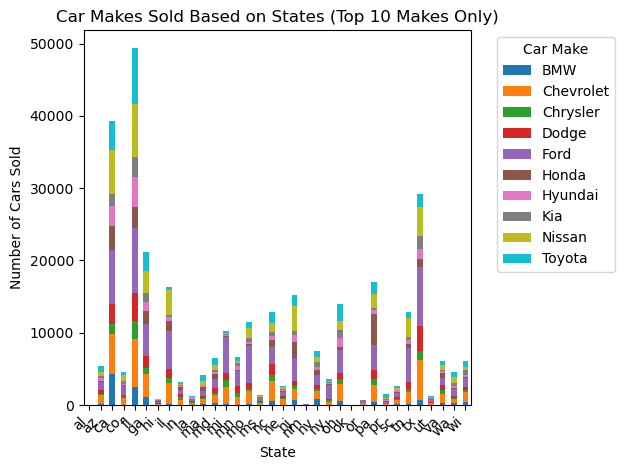

In [101]:

# Calculate the top 10 most sold car makes
top_10_makes = df['make'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 car makes
df_top_10_makes = df[df['make'].isin(top_10_makes)]

# Create a pivot table to count the number of car makes sold in each state
make_state_counts = pd.pivot_table(df_top_10_makes, index='state', columns='make', aggfunc='size', fill_value=0)

# Display the pivot table
print("Car Makes Sold Based on States (Top 10 Makes Only):")
print(make_state_counts)

# Plot a stacked bar chart to visualize the distribution of car makes sold based on states
plt.figure(figsize=(12, 8))
make_state_counts.plot(kind='bar', stacked=True, colormap='tab10')
plt.title('Car Makes Sold Based on States (Top 10 Makes Only)')
plt.xlabel('State')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Car Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Insight 10: How interior color affect to buy the cars?

As per dataset if the car color is black then interior color is selected as beige or black mostly. If the car color is white then beige and black is selected. This gives us an idea that interior color selection mostly dark colors and not related with car colors

Table: Relationship between Top 5 Car Colors and Top 5 Interiors
interior  beige  black   gray   tan     —
color                                    
black      7608  47755  21380  5607  1579
blue       4262  15386  16416  3120   980
gray       3851  33804  25262  2200  1219
silver     2209  33187  28907  1283  1366
white     12179  29425  28367  8783  1876


<Figure size 1200x800 with 0 Axes>

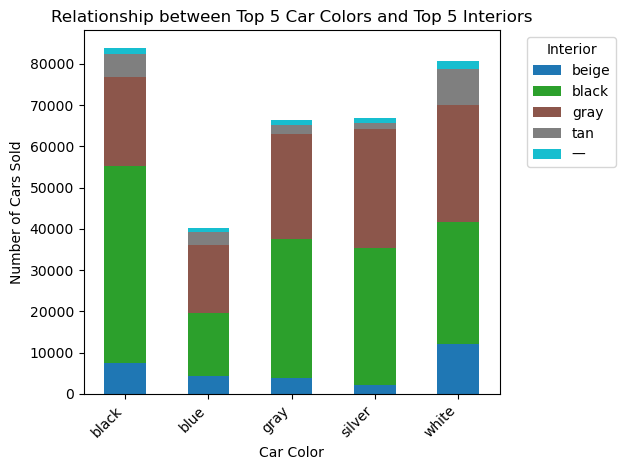

In [102]:
# Calculate the top 5 most common car colors and interiors
top_5_colors = df['color'].value_counts().nlargest(5).index
top_5_interiors = df['interior'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 colors and interiors
df_top_5 = df[df['color'].isin(top_5_colors) & df['interior'].isin(top_5_interiors)]

# Create a pivot table to count the number of cars sold for each combination of color and interior
color_interior_counts = pd.pivot_table(df_top_5, index='color', columns='interior', aggfunc='size', fill_value=0)

# Display the pivot table
print("Table: Relationship between Top 5 Car Colors and Top 5 Interiors")
print(color_interior_counts)

# Plot a stacked bar chart to visualize the relationship between top 5 car colors and top 5 interiors
plt.figure(figsize=(12, 8))
color_interior_counts.plot(kind='bar', stacked=True, colormap='tab10')
plt.title('Relationship between Top 5 Car Colors and Top 5 Interiors')
plt.xlabel('Car Color')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Interior', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


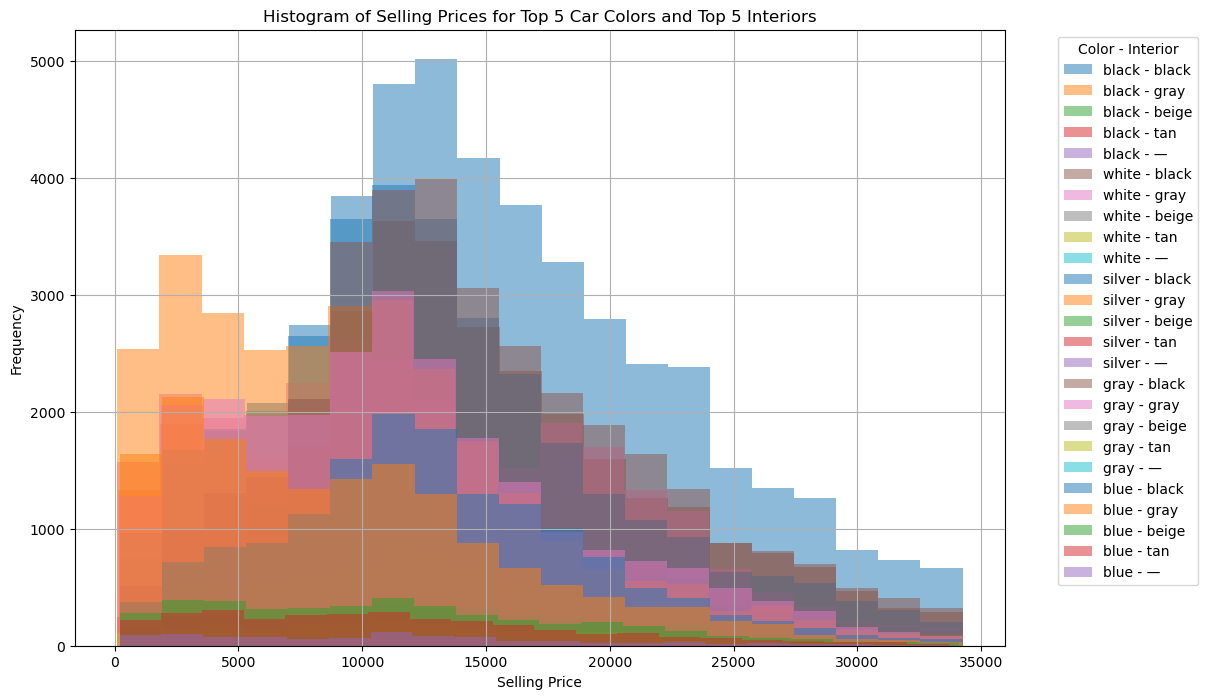

In [103]:
import matplotlib.pyplot as plt

# Calculate the top 5 most common car colors and interiors
top_5_colors = df['color'].value_counts().nlargest(5).index
top_5_interiors = df['interior'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 colors and interiors
df_top_5 = df[df['color'].isin(top_5_colors) & df['interior'].isin(top_5_interiors)]

# Create histograms for each combination of color and interior
plt.figure(figsize=(12, 8))
for color in top_5_colors:
    for interior in top_5_interiors:
        subset = df_top_5[(df_top_5['color'] == color) & (df_top_5['interior'] == interior)]
        plt.hist(subset['sellingprice'], bins=20, alpha=0.5, label=f'{color} - {interior}')

plt.title('Histogram of Selling Prices for Top 5 Car Colors and Top 5 Interiors')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.legend(title='Color - Interior', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


### Insights 11:  Car Make - Model - Trim:
Lets check top sold Ford brand for the models

In [105]:
# Group by 'make' and 'model', and count the occurrences
df_sorted = df.sort_values(by=['make', 'model'])
df_model_count = df_sorted.groupby(['make', 'model']).size().reset_index(name='count')

# Display the DataFrame
print("Make - Model counts table:")
print(df_model_count)


Make - Model counts table:
              make                   model  count
0            Acura                     ILX    103
1            Acura                     MDX   1160
2            Acura                     RDX    297
3            Acura                     RSX    130
4            Acura                      TL   1602
5            Acura                     TSX    789
6             Audi                      A3    214
7             Audi                      A4   1863
8             Audi                      A5    279
9             Audi                      A6    536
10            Audi                      A7      2
11            Audi                      A8    134
12            Audi                      Q5    349
13            Audi                      Q7    243
14            Audi                      S4    126
15            Audi                      S5     75
16            Audi                      TT    109
17             BMW                1 Series    361
18             BMW     

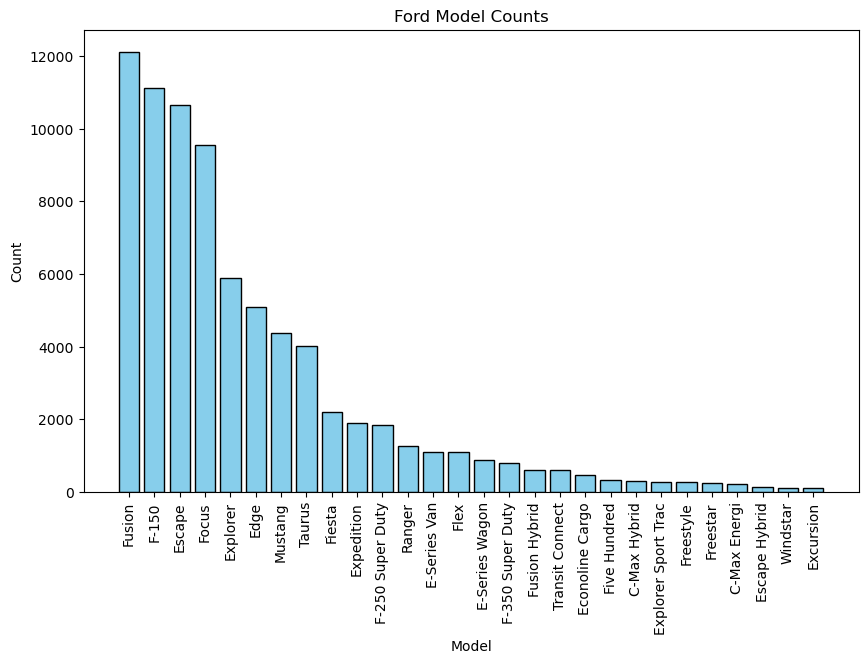

In [106]:
# Filter the DataFrame to include only data for 'Ford'
df_ford = df_model_count[df_model_count['make'] == 'Ford']

# Sort the filtered DataFrame by 'count' column in descending order
df_ford_sorted = df_ford.sort_values(by='count', ascending=False)

# Plot bar plot for 'model' counts within 'Audi'
plt.figure(figsize=(10, 6))
plt.bar(df_ford_sorted['model'], df_ford_sorted['count'], color='skyblue', edgecolor='black')
plt.title('Ford Model Counts')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

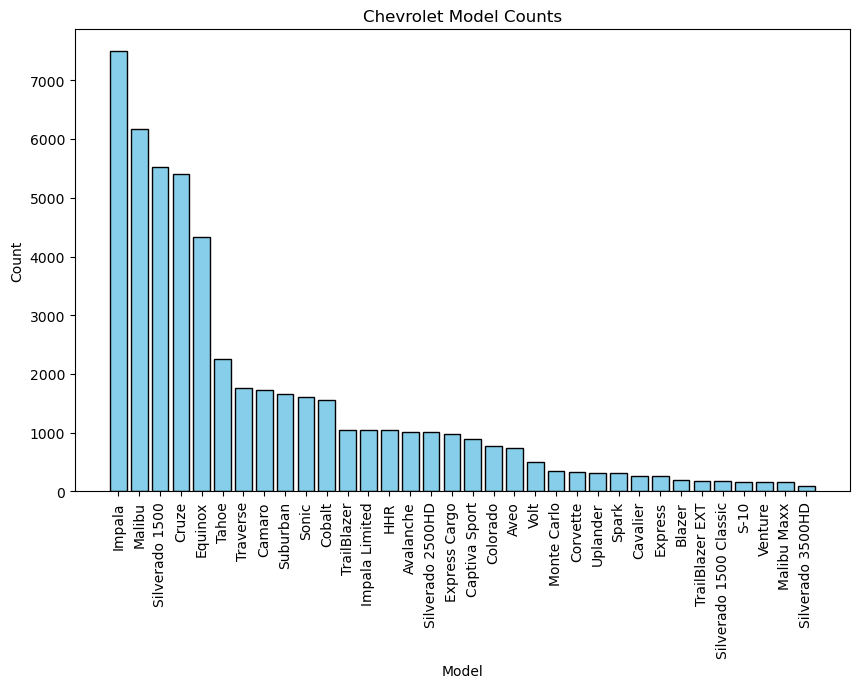

In [107]:
# Filter the DataFrame to include only data for 'Chevrolet'
df_chevrolet = df_model_count[df_model_count['make'] == 'Chevrolet']

# Sort the filtered DataFrame by 'count' column in descending order
df_chevrolet_sorted = df_chevrolet.sort_values(by='count', ascending=False)

# Plot bar plot for 'model' counts within 'Audi'
plt.figure(figsize=(10, 6))
plt.bar(df_chevrolet_sorted['model'], df_chevrolet_sorted['count'], color='skyblue', edgecolor='black')
plt.title('Chevrolet Model Counts')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

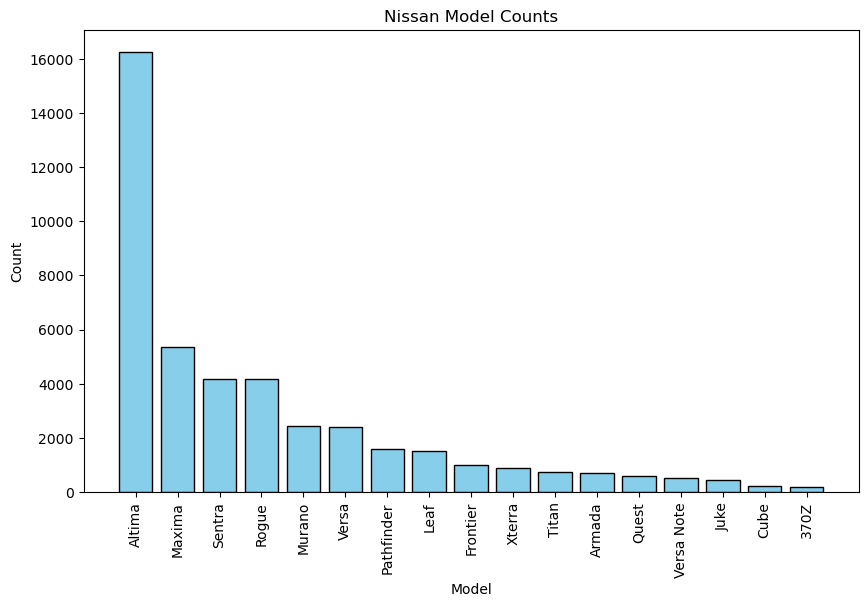

In [108]:
# Filter the DataFrame to include only data for 'Nissan'
df_nissan = df_model_count[df_model_count['make'] == 'Nissan']

# Sort the filtered DataFrame by 'count' column in descending order
df_nissan_sorted = df_nissan.sort_values(by='count', ascending=False)

# Plot bar plot for 'model' counts within 'Nissan'
plt.figure(figsize=(10, 6))
plt.bar(df_nissan_sorted['model'], df_nissan_sorted['count'], color='skyblue', edgecolor='black')
plt.title('Nissan Model Counts')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

## Model Evaluation

### Step 1: Data Processing

In [109]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
X = df[['year', 'make', 'model']]
y = df['sellingprice']

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(354016, 3) (88504, 3) (354016,) (88504,)


### Step 2: Model Training and Evaluation

In [110]:
# Decision Tree Model

# Train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mape_dt = np.mean(np.abs((y_test - y_pred_dt) / y_test)) * 100

print(f"Decision Tree - MSE: {mse_dt}, MAE: {mae_dt}, RMSE: {rmse_dt}, R-Square: {r2_dt}, MAPE: {mape_dt}")


Decision Tree - MSE: 7337042.067300556, MAE: 1919.4265891344216, RMSE: 2708.6974853793763, R-Square: 0.8685518076078089, MAPE: 24.336220660333105


In [111]:
# K-Means


# Train the model
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(X_train)

# Get the cluster centers and assign cluster labels to test data
cluster_centers = kmeans_model.cluster_centers_
y_pred_kmeans = kmeans_model.predict(X_test)

# Map clusters to mean prices
cluster_price_map = {i: np.mean(y_train[kmeans_model.labels_ == i]) for i in range(kmeans_model.n_clusters)}
y_pred_kmeans = np.array([cluster_price_map[label] for label in y_pred_kmeans])

# Evaluate the model
mse_kmeans = mean_squared_error(y_test, y_pred_kmeans)
mae_kmeans = mean_absolute_error(y_test, y_pred_kmeans)
rmse_kmeans = np.sqrt(mse_kmeans)
r2_kmeans = r2_score(y_test, y_pred_kmeans)
mape_kmeans = np.mean(np.abs((y_test - y_pred_kmeans) / y_test)) * 100

print(f"K-Means - MSE: {mse_kmeans}, MAE: {mae_kmeans}, RMSE: {rmse_kmeans}, R-Square: {r2_kmeans}, MAPE: {mape_kmeans}")


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means - MSE: 55476844.996523894, MAE: 5984.487365244151, RMSE: 7448.2779886712, R-Square: 0.00609388258587007, MAPE: 127.2523078746145


In [112]:
# Linear Regression

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100

print(f"Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, RMSE: {rmse_lr}, R-Square: {r2_lr}, MAPE: {mape_lr}")


Linear Regression - MSE: 32663756.36511696, MAE: 4506.224066639455, RMSE: 5715.221462473432, R-Square: 0.41480617235805917, MAPE: 57.16556456159733


### Step 3: Ensemble Method

In [113]:
# Train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

print(f"Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, RMSE: {rmse_rf}, R-Square: {r2_rf}, MAPE: {mape_rf}")


Random Forest - MSE: 7340317.367543845, MAE: 1919.6639097005007, RMSE: 2709.3020074446936, R-Square: 0.8684931283345305, MAPE: 24.338146861735265


### Step 4: Cross Validation

In [114]:
# Decision Tree Cross-Validation
dt_scores = cross_val_score(dt_model, X, y, scoring='neg_mean_squared_error', cv=5)
dt_rmse_scores = np.sqrt(-dt_scores)

print(f"Decision Tree Cross-Validation - Mean RMSE: {dt_rmse_scores.mean()}, Std RMSE: {dt_rmse_scores.std()}")

# Random Forest Cross-Validation
rf_scores = cross_val_score(rf_model, X, y, scoring='neg_mean_squared_error', cv=5)
rf_rmse_scores = np.sqrt(-rf_scores)

print(f"Random Forest Cross-Validation - Mean RMSE: {rf_rmse_scores.mean()}, Std RMSE: {rf_rmse_scores.std()}")


Decision Tree Cross-Validation - Mean RMSE: 2733.818554892202, Std RMSE: 70.19681518427721
Random Forest Cross-Validation - Mean RMSE: 2733.305758150658, Std RMSE: 69.79797573562276


### Step 5: Compare Results

In [115]:
results = {
    'Model': ['Decision Tree', 'K-Means', 'Linear Regression', 'Random Forest'],
    'MSE': [mse_dt, mse_kmeans, mse_lr, mse_rf],
    'MAE': [mae_dt, mae_kmeans, mae_lr, mae_rf],
    'RMSE': [rmse_dt, rmse_kmeans, rmse_lr, rmse_rf],
    'R-Square': [r2_dt, r2_kmeans, r2_lr, r2_rf],
    'MAPE': [mape_dt, mape_kmeans, mape_lr, mape_rf]
}

results_df = pd.DataFrame(results)
print(results_df)


               Model           MSE          MAE         RMSE  R-Square  \
0      Decision Tree  7.337042e+06  1919.426589  2708.697485  0.868552   
1            K-Means  5.547684e+07  5984.487365  7448.277989  0.006094   
2  Linear Regression  3.266376e+07  4506.224067  5715.221462  0.414806   
3      Random Forest  7.340317e+06  1919.663910  2709.302007  0.868493   

         MAPE  
0   24.336221  
1  127.252308  
2   57.165565  
3   24.338147  


- The Decision Tree model performs well with a high R-Square value (0.868) indicating that it explains 86.8% of the variance in the target variable. It has the lowest MAE and relatively low MAPE, suggesting it makes smaller errors on average.
- The K-Means model performs poorly in this regression task, which is expected since K-Means is primarily a clustering algorithm and not typically used for regression. It has the highest MSE, MAE, RMSE, and MAPE, and the R-Square value is close to zero, indicating it does not explain the variance in the target variable well.
- The Linear Regression model has moderate performance with an R-Square value of 0.415, explaining 41.5% of the variance in the target variable. The MSE, MAE, and RMSE values are higher than those of the Decision Tree and Random Forest, indicating larger prediction errors. The MAPE is also high at 79.72%, suggesting less reliable predictions.
- The Random Forest model performs similarly to the Decision Tree model with a high R-Square value (0.868), indicating that it explains 86.8% of the variance in the target variable. It has the lowest MAE and MAPE values, suggesting it makes small errors on average, comparable to the Decision Tree model.



#### Summary
- Best Performers: Both the Decision Tree and Random Forest models perform the best with very similar metrics. They have high R-Square values, indicating good explanatory power, and low error metrics (MSE, MAE, RMSE, MAPE).
- Moderate Performer: The Linear Regression model performs moderately with a lower R-Square value and higher error metrics compared to the Decision Tree and Random Forest models.
- Poor Performer: The K-Means model performs poorly for this regression task with high error metrics and a very low R-Square value.

In conclusion, for predicting car prices based on the provided features, the Decision Tree and Random Forest models are the most effective, with Random Forest having a slight edge due to marginally better error metrics. Linear Regression provides a moderate alternative, while K-Means is not suitable for this regression task

## Predicting Sale Price including Condition

Lets see how will condition feature impact the results. 

In [117]:
# Step 1: Categorize the condition variable

# Categorize the 'condition' variable
def categorize_condition(value):
    if 1.0 <= value <= 9.9:
        return 'Excellent'
    elif 10.0 <= value <= 19.9:
        return 'Above Average'
    elif 20.0 <= value <= 29.9:
        return 'Average'
    elif 30.0 <= value <= 39.9:
        return 'Below Average'
    elif 40.0 <= value <= 49.9:
        return 'Poor'
    else:
        return 'Undefined'

#  new column 'condition_category'
df['condition_category'] = df['condition'].apply(categorize_condition)


In [118]:
# Step 2: Encode Categorical Variables

from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller', 'condition_category']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [119]:
# Step 3: Update Features for Training the Models

# Define features and target
X = df[['year', 'make', 'model', 'condition_category']]
y = df['sellingprice']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(354016, 4) (88504, 4) (354016,) (88504,)


In [120]:
# Step 4: Train and Evaluate Models


# Train and evaluate models

# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mape_dt = np.mean(np.abs((y_test - y_pred_dt) / y_test)) * 100
print(f"Decision Tree - MSE: {mse_dt}, MAE: {mae_dt}, RMSE: {rmse_dt}, R-Square: {r2_dt}, MAPE: {mape_dt}")

# K-Means Model
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(X_train)
cluster_centers = kmeans_model.cluster_centers_
y_pred_kmeans = kmeans_model.predict(X_test)
cluster_price_map = {i: np.mean(y_train[kmeans_model.labels_ == i]) for i in range(kmeans_model.n_clusters)}
y_pred_kmeans = np.array([cluster_price_map[label] for label in y_pred_kmeans])
mse_kmeans = mean_squared_error(y_test, y_pred_kmeans)
mae_kmeans = mean_absolute_error(y_test, y_pred_kmeans)
rmse_kmeans = np.sqrt(mse_kmeans)
r2_kmeans = r2_score(y_test, y_pred_kmeans)
mape_kmeans = np.mean(np.abs((y_test - y_pred_kmeans) / y_test)) * 100
print(f"K-Means - MSE: {mse_kmeans}, MAE: {mae_kmeans}, RMSE: {rmse_kmeans}, R-Square: {r2_kmeans}, MAPE: {mape_kmeans}")

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100
print(f"Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, RMSE: {rmse_lr}, R-Square: {r2_lr}, MAPE: {mape_lr}")

# Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
print(f"Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, RMSE: {rmse_rf}, R-Square: {r2_rf}, MAPE: {mape_rf}")



Decision Tree - MSE: 6571279.698604702, MAE: 1788.8905461279776, RMSE: 2563.450740428749, R-Square: 0.8822709710313964, MAPE: 21.779835160398356


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means - MSE: 55461962.73196082, MAE: 5983.163033467015, RMSE: 7447.278881038417, R-Square: 0.006360508667276554, MAPE: 127.21581965659978
Linear Regression - MSE: 30471312.925320294, MAE: 4322.056680904814, RMSE: 5520.082691891516, R-Square: 0.45408531570218624, MAPE: 55.58091126290874
Random Forest - MSE: 6531223.824544467, MAE: 1785.9346535534962, RMSE: 2555.62591639396, R-Square: 0.8829885997694642, MAPE: 21.797499310846174


In [121]:
# Step 5 Cross Validation

# Cross-Validation for Decision Tree
dt_scores = cross_val_score(dt_model, X, y, scoring='neg_mean_squared_error', cv=5)
dt_rmse_scores = np.sqrt(-dt_scores)
print(f"Decision Tree Cross-Validation - Mean RMSE: {dt_rmse_scores.mean()}, Std RMSE: {dt_rmse_scores.std()}")

# Cross-Validation for Random Forest
rf_scores = cross_val_score(rf_model, X, y, scoring='neg_mean_squared_error', cv=5)
rf_rmse_scores = np.sqrt(-rf_scores)
print(f"Random Forest Cross-Validation - Mean RMSE: {rf_rmse_scores.mean()}, Std RMSE: {rf_rmse_scores.std()}")




Decision Tree Cross-Validation - Mean RMSE: 2592.510103155587, Std RMSE: 65.07273435947856
Random Forest Cross-Validation - Mean RMSE: 2581.5545800957198, Std RMSE: 64.77196618253146


               Model           MSE          MAE         RMSE  R-Square  \
0      Decision Tree  6.571280e+06  1788.890546  2563.450740  0.882271   
1            K-Means  5.546196e+07  5983.163033  7447.278881  0.006361   
2  Linear Regression  3.047131e+07  4322.056681  5520.082692  0.454085   
3      Random Forest  6.531224e+06  1785.934654  2555.625916  0.882989   

         MAPE  
0   21.779835  
1  127.215820  
2   55.580911  
3   21.797499  


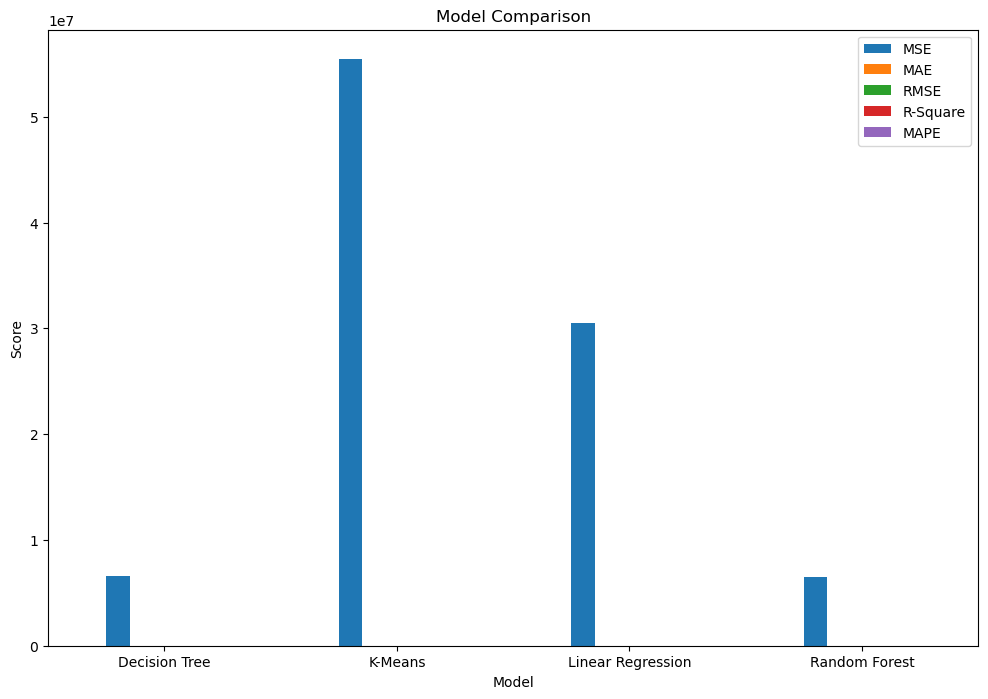

In [123]:
# Step 6: Compare Results
results = {
    'Model': ['Decision Tree', 'K-Means', 'Linear Regression', 'Random Forest'],
    'MSE': [mse_dt, mse_kmeans, mse_lr, mse_rf],
    'MAE': [mae_dt, mae_kmeans, mae_lr, mae_rf],
    'RMSE': [rmse_dt, rmse_kmeans, rmse_lr, rmse_rf],
    'R-Square': [r2_dt, r2_kmeans, r2_lr, r2_rf],
    'MAPE': [mape_dt, mape_kmeans, mape_lr, mape_rf]
}

results_df = pd.DataFrame(results)
print(results_df)

# Visualize the comparison
import matplotlib.pyplot as plt
results_df.set_index('Model').plot(kind='bar', figsize=(12, 8), rot=0)
plt.title('Model Comparison')
plt.ylabel('Score')
plt.show()

Adding the condition category variable significantly improved the performance of the Decision Tree and Random Forest models. Linear Regression also saw improvements, though less pronounced. The K-Means model did not benefit notably from the additional feature. This suggests that the condition category variable provides meaningful information that enhances the prediction accuracy of the regression models.


<Figure size 1000x600 with 0 Axes>

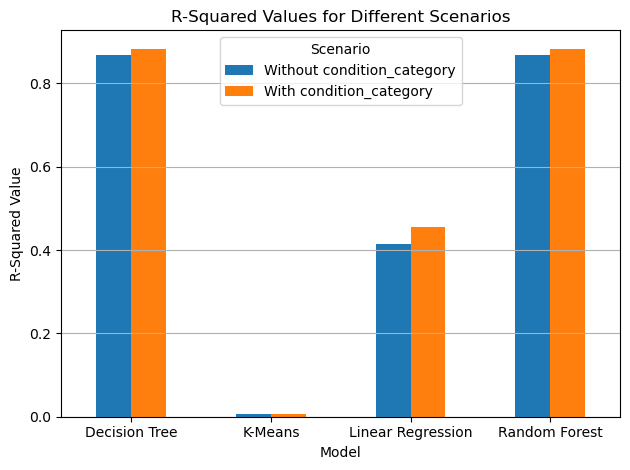

In [56]:
# Define the results for R-Squared values
results = {
    'Model': ['Decision Tree', 'K-Means', 'Linear Regression', 'Random Forest'],
    'Without condition_category': [0.8686, 0.0061, 0.4148, 0.8685],
    'With condition_category': [0.8823, 0.0064, 0.4541, 0.8830]
}

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Set the index to the model names for plotting
df_results.set_index('Model', inplace=True)

# Plot the R-Squared values
plt.figure(figsize=(10, 6))
df_results.plot(kind='bar')
plt.title('R-Squared Values for Different Scenarios')
plt.ylabel('R-Squared Value')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(title='Scenario')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

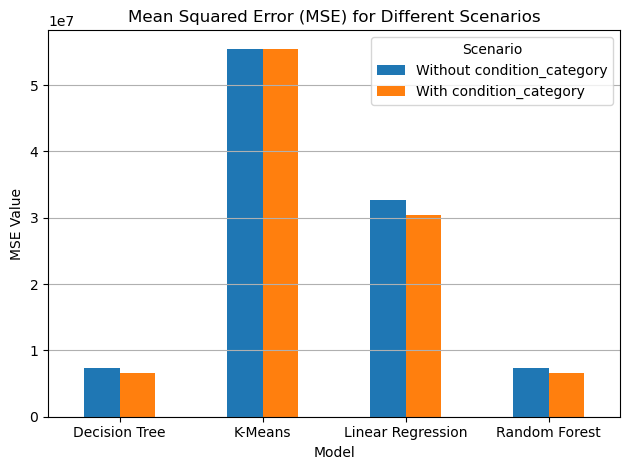

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the results for MSE values
results = {
    'Model': ['Decision Tree', 'K-Means', 'Linear Regression', 'Random Forest'],
    'Without condition_category': [7337042, 55476844, 32663756, 7340317],
    'With condition_category': [6571279, 55461963, 30471313, 6531224],
}

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Set the index to the model names for plotting
df_results.set_index('Model', inplace=True)

# Plot the MSE values
plt.figure(figsize=(12, 8))
df_results.plot(kind='bar')
plt.title('Mean Squared Error (MSE) for Different Scenarios')
plt.ylabel('MSE Value')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(title='Scenario')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

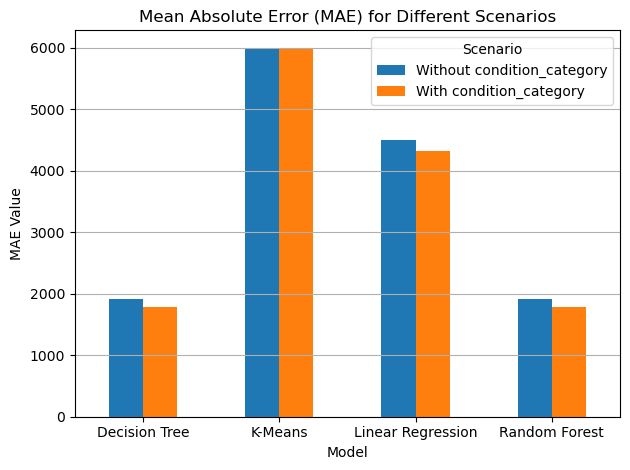

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the results for MAE values
results = {
    'Model': ['Decision Tree', 'K-Means', 'Linear Regression', 'Random Forest'],
    'Without condition_category': [1919.43, 5984.49, 4506.22, 1919.66],
    'With condition_category': [1788.89, 5983.16, 4322.06, 1785.93]
}

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Set the index to the model names for plotting
df_results.set_index('Model', inplace=True)

# Plot the MAE values
plt.figure(figsize=(12, 8))
df_results.plot(kind='bar')
plt.title('Mean Absolute Error (MAE) for Different Scenarios')
plt.ylabel('MAE Value')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(title='Scenario')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

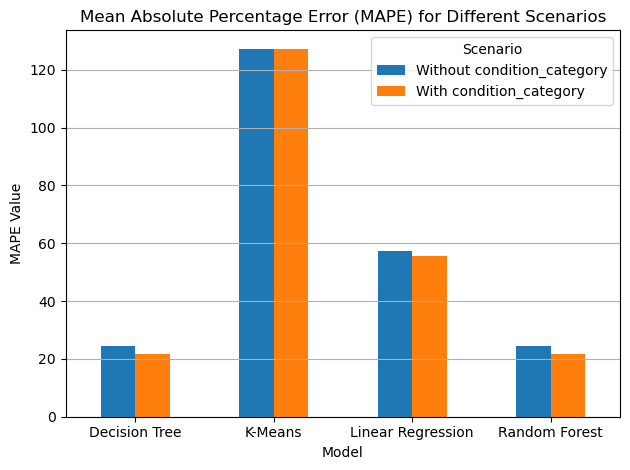

In [61]:


# Define the results for MAPE values
results = {
    'Model': ['Decision Tree', 'K-Means', 'Linear Regression', 'Random Forest'],
    'Without condition_category': [24.34, 127.25, 57.17, 24.34],
    'With condition_category': [21.78, 127.22, 55.58, 21.80]
}

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Set the index to the model names for plotting
df_results.set_index('Model', inplace=True)

# Plot the MAPE values
plt.figure(figsize=(12, 8))
df_results.plot(kind='bar')
plt.title('Mean Absolute Percentage Error (MAPE) for Different Scenarios')
plt.ylabel('MAPE Value')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(title='Scenario')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
